Importamos los paquetes necesarios

In [1]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt

TAREA: Realiza la cuenta de píxeles blancos por filas, determina el máximo para filas y columnas (uno para cada) y muestra el número de valores que superan en cada caso 0.95*máximo.

Máximo de píxeles blancos por columna = 191.0
El número de columnas que tienen un número de píxeles blancos superior a 0.95 * 191.0 es: 8


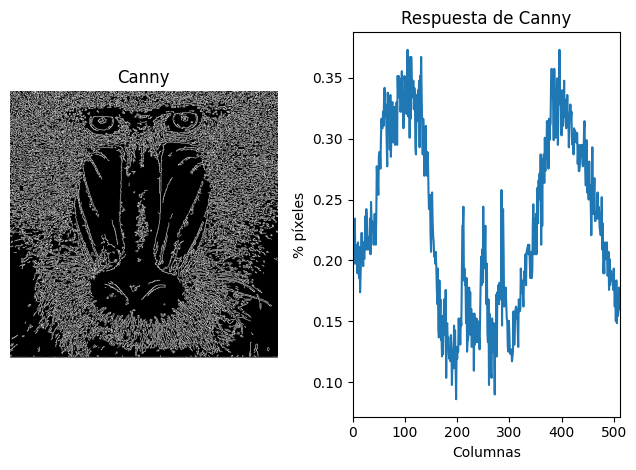

In [67]:
#Lee imagen de archivo
img = cv2.imread('mandril.jpg') 

#Conversión a grises de la original en BGR
gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#Obtiene contornos con el operador de Canny
canny = cv2.Canny(gris, 100, 200)

#Si muestras el contenido de la imagen resultado, son valores 0 o 255
#print(canny)
#Cuenta el número de píxeles blancos (255) por columna
#Suma los valores de los pixeles por columna
col_counts = cv2.reduce(canny, 0, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)

#Normaliza en base al número de columnas y al valor máximo del píxel (255)
#El resultado será el porcentaje de píxeles blancos por columna
cols = col_counts[0] / (255 * canny.shape[1])

#Muestra dicha cuenta gráficamente
plt.figure()
plt.subplot(1, 2, 1)
plt.axis("off")
plt.title("Canny")
plt.imshow(canny, cmap='gray') 

plt.subplot(1, 2, 2)
plt.title("Respuesta de Canny")
plt.xlabel("Columnas")
plt.ylabel("% píxeles")
plt.plot(cols)
#Rango en x definido por las columnas
plt.xlim([0, canny.shape[1]]) 

# Ajusta el espaciado entre los subgráficos
plt.tight_layout()

#Calculamos la columna con más píxeles blancos.
max_col = max(col_counts[0])

#Ahora mismo tenemos el resultado expresado de la forma 255 * nº de píxeles blancos en dicha columna
#Por tanto, debemos dividir el resultado entre 255
max_col /= 255
print("Máximo de píxeles blancos por columna =", max_col)

#Calculamos cuantas columnas tienen un número de píxeles blancos superior a 0.95 * máximo
limit = 0.95 * 255 * max_col
col_counts = np.array(col_counts)
max_cols = np.count_nonzero(col_counts > limit)
print("El número de columnas que tienen un número de píxeles blancos superior a 0.95 *", max_col, "es:", max_cols)

Máximo de píxeles blancos por fila = 406.0
El número de filas que tienen un número de píxeles blancos superior a 0.95 * 406.0 es: 1


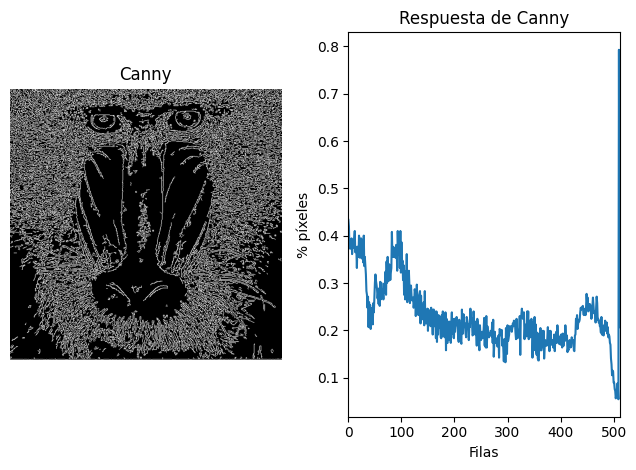

In [68]:
#Si muestras el contenido de la imagen resultado, son valores 0 o 255
#print(canny)
#Cuenta el número de píxeles blancos (255) por fila
#Suma los valores de los pixeles por fila
row_counts = cv2.reduce(canny, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)

#Al haberlo hecho por filas, debemos hacer la transpuesta para recuperar
#la forma que teníamos al hacerlo por columnas
row_counts = np.array(row_counts).T

#Normaliza en base al número de filas y al valor máximo del píxel (255)
#El resultado será el porcentaje de píxeles blancos por fila
rows = row_counts[0] / (255 * canny.shape[0])

#Muestra dicha cuenta gráficamente
plt.figure()
plt.subplot(1, 2, 1)
plt.axis("off")
plt.title("Canny")
plt.imshow(canny, cmap='gray') 

plt.subplot(1, 2, 2)
plt.title("Respuesta de Canny")
plt.xlabel("Filas")
plt.ylabel("% píxeles")
plt.plot(rows)
#Rango en x definido por las filas
plt.xlim([0, canny.shape[0]])

# Ajusta el espaciado entre los subgráficos
plt.tight_layout()

#Calculamos la columna con más píxeles blancos.
max_row = max(row_counts[0])

#Ahora mismo tenemos el resultado expresado de la forma 255 * nº de píxeles blancos en dicha fila
#Por tanto, debemos dividir el resultado entre 255
max_row /= 255
print("Máximo de píxeles blancos por fila =", max_row)

#Calculamos cuantas filas tienen un número de píxeles blancos superior a 0.95 * máximo
limit = 0.95 * 255 * max_row
max_rows = np.count_nonzero(row_counts > limit)
print("El número de filas que tienen un número de píxeles blancos superior a 0.95 *", max_row, "es:", max_rows)

TAREA: Elige otra imagen, muestra el contenido de alguna de las imágenes resultado de Sobel antes y después de ajustar la escala

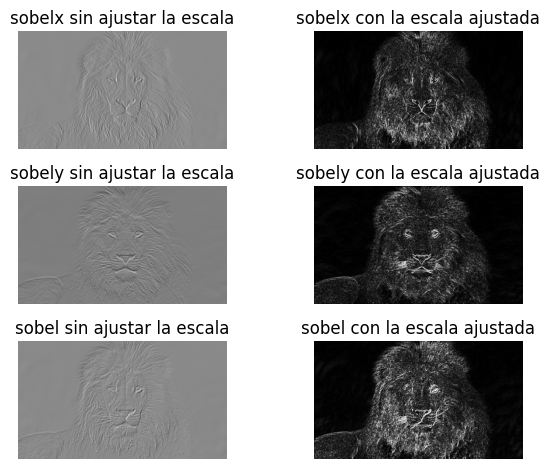

In [69]:
#Lee imagen de archivo
img = cv2.imread('leon.jpg') 

#Conversión a grises de la original en BGR
gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Gaussiana para suavizar la imagen original
ggris = cv2.GaussianBlur(gris, (3, 3), 0)

#Calcula en ambas direcciones (horizontal y vertical)
sobelx = cv2.Sobel(ggris, cv2.CV_64F, 1, 0)  # x
sobely = cv2.Sobel(ggris, cv2.CV_64F, 0, 1)  # y
#Combina ambos resultados
sobel = cv2.add(sobelx, sobely)

# Subgráfico 1: sobelx sin ajustar la escala
plt.subplot(3, 2, 1)
plt.axis("off")
plt.title('sobelx sin ajustar la escala')
plt.imshow(sobelx, cmap='gray')

# Subgráfico 2: sobelx con la escala ajustada
plt.subplot(3, 2, 2)
plt.axis("off")
plt.title('sobelx con la escala ajustada')
plt.imshow(cv2.convertScaleAbs(sobelx), cmap='gray')

# Subgráfico 3: sobely sin ajustar la escala
plt.subplot(3, 2, 3)
plt.axis("off")
plt.title('sobely sin ajustar la escala')
plt.imshow(sobely, cmap='gray')

# Subgráfico 4: sobely con la escala ajustada
plt.subplot(3, 2, 4)
plt.axis("off")
plt.title('sobely con la escala ajustada')
plt.imshow(cv2.convertScaleAbs(sobely), cmap='gray')

# Subgráfico 5: sobel sin ajustar la escala
plt.subplot(3, 2, 5)
plt.axis("off")
plt.title('sobel sin ajustar la escala')
plt.imshow(sobel, cmap='gray')

# Subgráfico 6: sobel con la escala ajustada
plt.subplot(3, 2, 6)
plt.axis("off")
plt.title('sobel con la escala ajustada')
plt.imshow(cv2.convertScaleAbs(sobel), cmap='gray')

# Ajusta el espaciado entre los subgráficos
plt.tight_layout()

# Muestra la figura con todos los subgráficos
plt.show()

TAREA: Aplica umbralizado a la imagen resultante de Sobel (valores 0 a 255 y convertida a 8 bits por ejemplo sobel8 = np.uint8(sobel)), y posteriormente realiza el conteo por filas y columnas similar al realizado en el ejemplo con la salida de Canny. Calcula los máximos por filas y columnas, y determina las filas y columnas por encima del 0.95*máximo. Remarca con alguna primitiva gráfica dichas filas y columnas sobre la imagen ¿Cómo se comparan los resultados obtenidos a partir de Sobel y Canny?

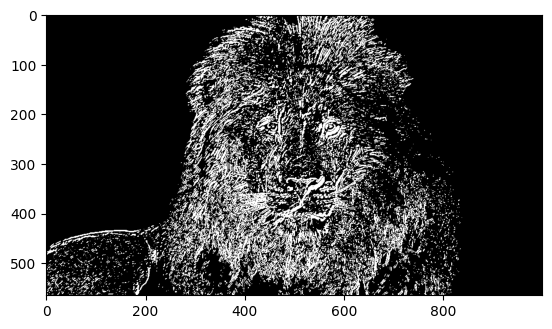

Máximo de píxeles blancos por columna = 278.0
El número de columnas que tienen un número de píxeles blancos superior a 0.95 * 278.0 es: 5
(array([0, 0, 0, 0, 0], dtype=int64), array([364, 371, 372, 381, 384], dtype=int64))
Máximo de píxeles blancos por fila = 322.0
El número de filas que tienen un número de píxeles blancos superior a 0.95 * 322.0 es: 6


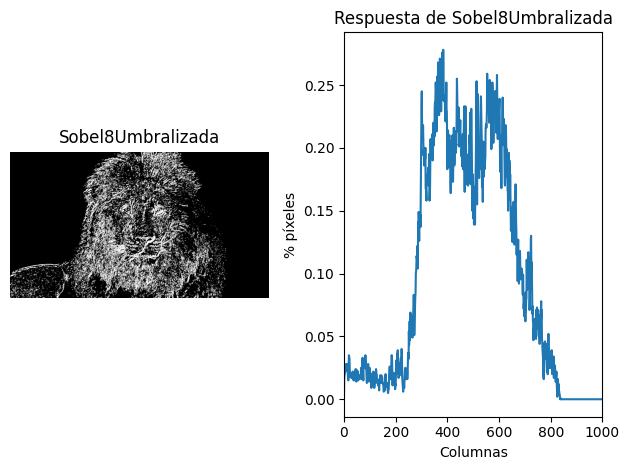

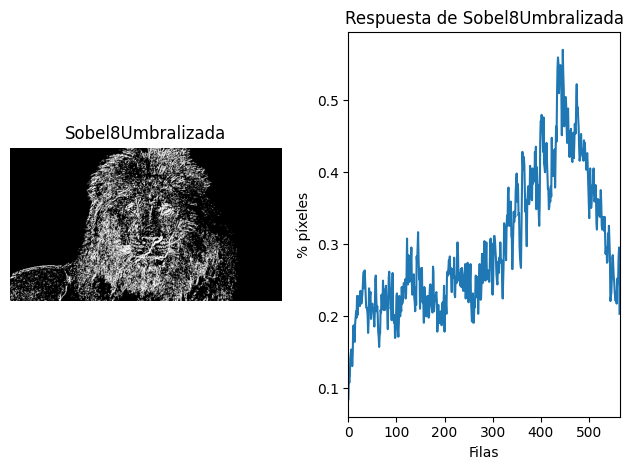

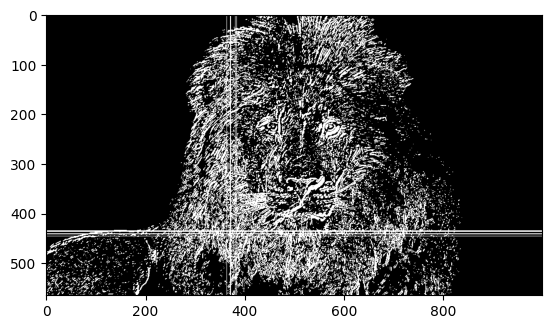

In [98]:
#Convertimos a 8 bits
sobel8 = np.uint8(cv2.convertScaleAbs(sobel))

#Define valor umbral
valorUmbral = 70 

#Obtiene imagen umbralizada para dicho valor definido
res, sobel8Umbralizada = cv2.threshold(sobel8, valorUmbral, 255, cv2.THRESH_BINARY)

#Muestra resultado
plt.imshow(sobel8Umbralizada, cmap='gray') #Visualiza con mapa de color gris
plt.show()

#Si muestras el contenido de la imagen resultado, son valores 0 o 255
#print(canny)
#Cuenta el número de píxeles blancos (255) por columna
#Suma los valores de los pixeles por columna
col_counts = cv2.reduce(sobel8Umbralizada, 0, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)

#Normaliza en base al número de columnas y al valor máximo del píxel (255)
#El resultado será el porcentaje de píxeles blancos por columna
cols = col_counts[0] / (255 * sobel8Umbralizada.shape[1])

#Muestra dicha cuenta gráficamente
plt.figure()
plt.subplot(1, 2, 1)
plt.axis("off")
plt.title("Sobel8Umbralizada")
plt.imshow(sobel8Umbralizada, cmap='gray') 

plt.subplot(1, 2, 2)
plt.title("Respuesta de Sobel8Umbralizada")
plt.xlabel("Columnas")
plt.ylabel("% píxeles")
plt.plot(cols)
#Rango en x definido por las columnas
plt.xlim([0, sobel8Umbralizada.shape[1]]) 

# Ajusta el espaciado entre los subgráficos
plt.tight_layout()

#Calculamos la columna con más píxeles blancos.
max_col = max(col_counts[0])

#Ahora mismo tenemos el resultado expresado de la forma 255 * nº de píxeles blancos en dicha columna
#Por tanto, debemos dividir el resultado entre 255
max_col /= 255
print("Máximo de píxeles blancos por columna =", max_col)

#Calculamos cuantas columnas tienen un número de píxeles blancos superior a 0.95 * máximo
limit = 0.95 * 255 * max_col
col_counts = np.array(col_counts)
#Como col_counts tiene dos dimensiones, el resultado de np.where nos devolverá dos arrays,
#El primero tendrá los índices de filas y el segundo los de las columnas que cumplen dicha condición
#Al sólo haber una fila, el primer array que devuelve lo descartamos. El segundo nos dará el número de la columna
#que cumple la condición que buscamos y por tanto su longitud será el número de columnas que cumplen dicha condición.
max_cols = np.where(col_counts > limit)
print("El número de columnas que tienen un número de píxeles blancos superior a 0.95 *", max_col, "es:", len(max_cols[1]))

print(max_cols)
#Si muestras el contenido de la imagen resultado, son valores 0 o 255
#print(canny)
#Cuenta el número de píxeles blancos (255) por fila
#Suma los valores de los pixeles por fila
row_counts = cv2.reduce(sobel8Umbralizada, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)

#Al haberlo hecho por filas, debemos hacer la transpuesta para recuperar
#la forma que teníamos al hacerlo por columnas
row_counts = np.array(row_counts).T

#Normaliza en base al número de filas y al valor máximo del píxel (255)
#El resultado será el porcentaje de píxeles blancos por fila
rows = row_counts[0] / (255 * sobel8Umbralizada.shape[0])

#Muestra dicha cuenta gráficamente
plt.figure()
plt.subplot(1, 2, 1)
plt.axis("off")
plt.title("Sobel8Umbralizada")
plt.imshow(sobel8Umbralizada, cmap='gray') 

plt.subplot(1, 2, 2)
plt.title("Respuesta de Sobel8Umbralizada")
plt.xlabel("Filas")
plt.ylabel("% píxeles")
plt.plot(rows)
#Rango en x definido por las filas
plt.xlim([0, sobel8Umbralizada.shape[0]])

# Ajusta el espaciado entre los subgráficos
plt.tight_layout()

#Calculamos la columna con más píxeles blancos.
max_row = max(row_counts[0])

#Ahora mismo tenemos el resultado expresado de la forma 255 * nº de píxeles blancos en dicha fila
#Por tanto, debemos dividir el resultado entre 255
max_row /= 255
print("Máximo de píxeles blancos por fila =", max_row)

#Calculamos cuantas filas tienen un número de píxeles blancos superior a 0.95 * máximo
limit = 0.95 * 255 * max_row
max_rows = np.where(row_counts > limit)
print("El número de filas que tienen un número de píxeles blancos superior a 0.95 *", max_row, "es:", len(max_rows[1]))

for index in max_rows[1]:
    sobel8Umbralizada[index, :] = 255
for index in max_cols[1]:
    sobel8Umbralizada[:, index] = 255


#Muestra resultado
plt.figure()
plt.imshow(sobel8Umbralizada, cmap='gray') #Visualiza con mapa de color gris
plt.show()
